### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Code starts here
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
# Code ends here.

In [14]:
train.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,8,155.8800,202,2469,4.7,1,4.9,9,4.7,7,0
1,26,19.9900,9,252,4.8,0,4.6,39,4.6,20,1
2,26,91.6980,56,659,4.6,0,4.6,34,3.9,4,2
3,11,24.3878,1,19,3.0,5,4.0,13,4.0,10,3
4,7,609.9878,84,4016,4.5,1,3.9,34,3.5,10,4


In [15]:
test.head()

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,26,8,941,4.6,0,4.6,33,4.3,16,9907
1,11,0,19,0.0,5,0.0,13,0.0,7,5243
2,29,34,1376,4.0,1,4.3,34,3.8,12,8276
3,26,0,369,0.0,5,0.0,28,0.0,9,6501
4,11,1,19,3.0,5,4.0,13,4.0,0,1619


In [16]:
X=train.drop('list_price',axis=1)
y=train['list_price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

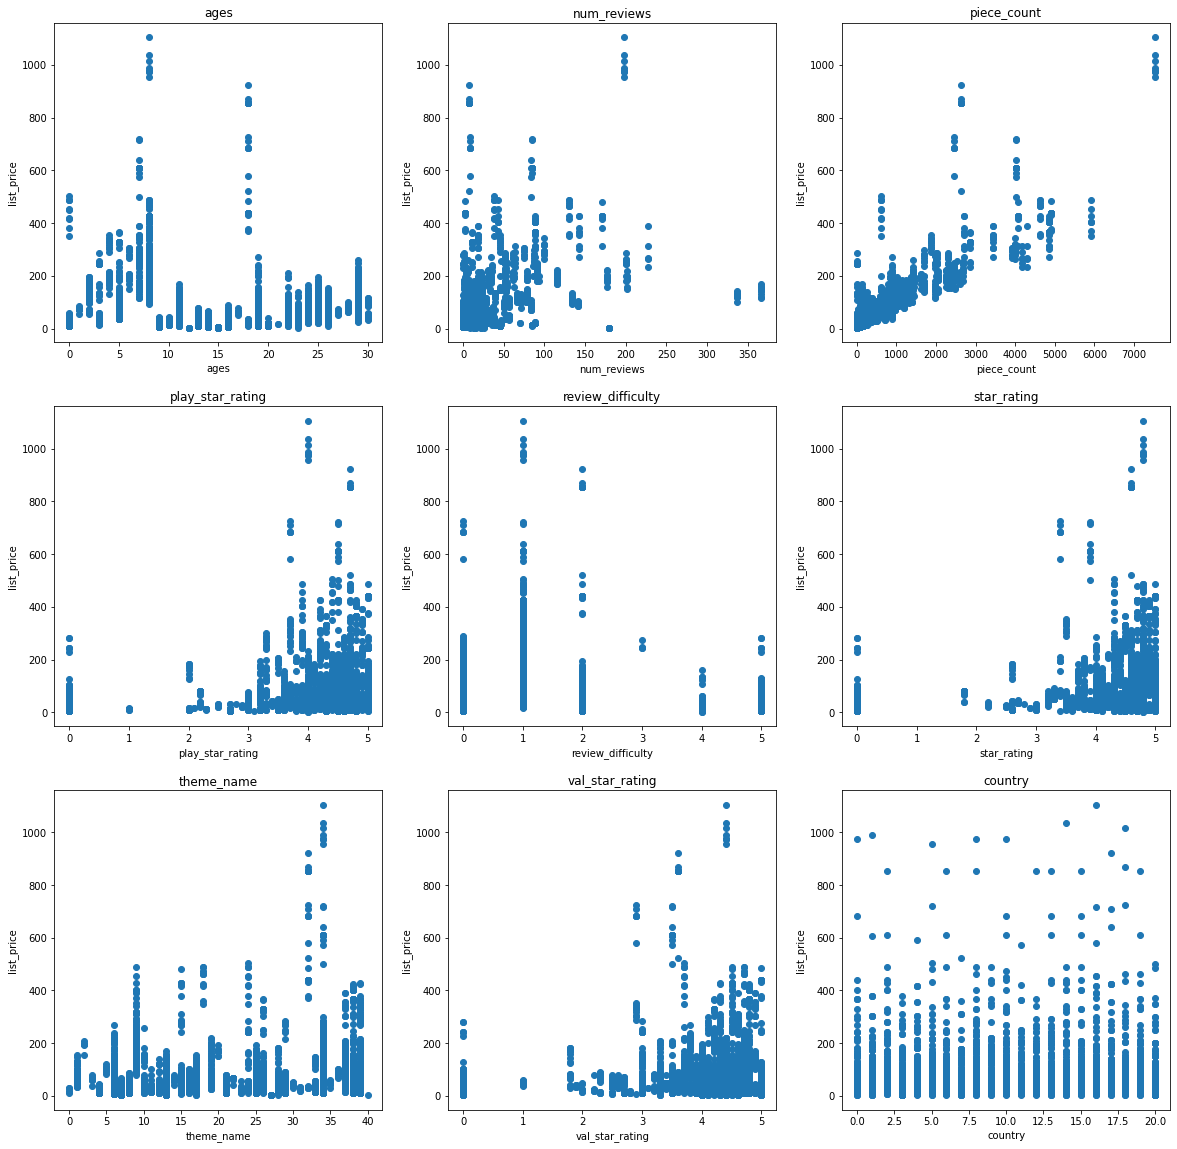

In [17]:
# Code starts here

cols=X_train.columns

fig,axes=plt.subplots(nrows=3, ncols=3, figsize=(20,20))

for i in range(0,3):
    for j in range(0,3):
        col=cols[i*3+j]
        axes[i,j].set_title(col)
        axes[i,j].scatter(X_train[col],y_train)
        axes[i,j].set_xlabel(col)
        axes[i,j].set_ylabel('list_price')
plt.show()
# Code ends here.

### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

In [19]:
# Code starts here
corr=X_train.corr()

X_train.drop(['play_star_rating','val_star_rating'],axis=1,inplace=True)

X_test.drop(['play_star_rating','val_star_rating'],axis=1,inplace=True)
# Code ends here.

                       ages  num_reviews  piece_count  play_star_rating  \
ages               1.000000    -0.164710    -0.088603          0.234164   
num_reviews       -0.164710     1.000000     0.539668          0.153302   
piece_count       -0.088603     0.539668     1.000000          0.176931   
play_star_rating   0.234164     0.153302     0.176931          1.000000   
review_difficulty -0.237208    -0.202573    -0.312483         -0.677050   
star_rating        0.100586     0.160835     0.180825          0.898539   
theme_name         0.489255     0.011948     0.167727          0.150988   
val_star_rating    0.121590     0.174555     0.194219          0.921722   
country            0.003026    -0.009421    -0.007397          0.000693   
Id                 0.013248    -0.006217    -0.004683         -0.000733   

                   review_difficulty  star_rating  theme_name  \
ages                       -0.237208     0.100586    0.489255   
num_reviews                -0.202573     0.1

### Model building

In [23]:
# Code starts here
regressor=LinearRegression()

regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)

print(mean_squared_error(y_pred,y_test))
print(r2_score(y_pred,y_test))

# Code ends here.

2091.3611553000283
0.6770242383166662


### Residual check!

- Check the distribution of the residual.

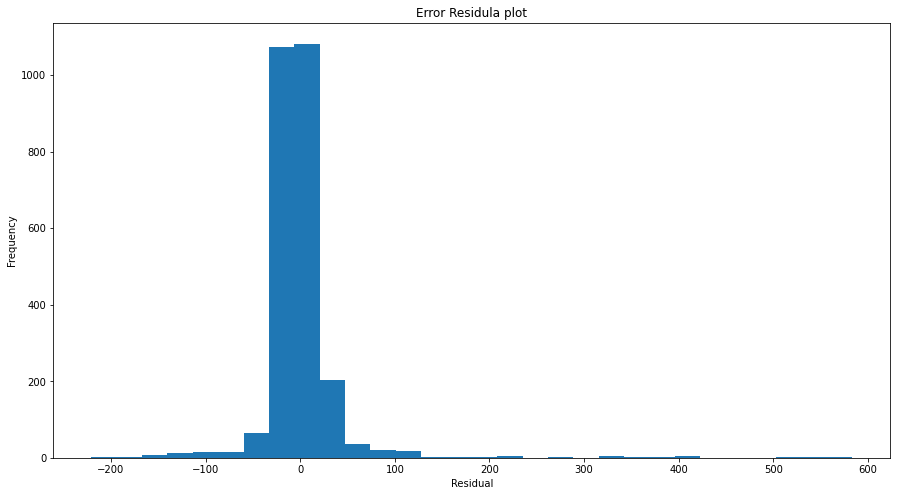

In [24]:
# Code starts here

residual=(y_test-y_pred)

plt.figure(figsize=(15,8))
plt.hist(residual,bins=30)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Error Residula plot')
plt.show()

# Code ends here.

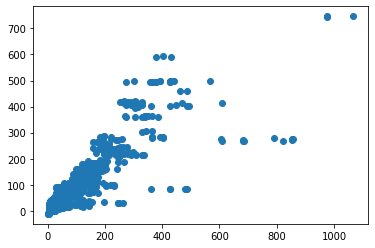

In [25]:
plt.scatter(y_test, y_pred)
plt.show()

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [43]:
# Code starts here
test.columns
Id =test['Id']
# Code ends here.

In [38]:
test.drop(['play_star_rating','val_star_rating'],axis=1,inplace=True)

In [39]:
pred = regressor.predict(test)

In [44]:
submission_file1 = pd.DataFrame({'Id' : Id, 'list_price' : pred})
submission_file1.to_csv('submission_1.csv', index = False)